# Function iapolar

## Introduction

- The polar coordinates (r, θ) of a point on the Euclidean plane whose origin is denoted by point 'O' are defined as:
    - r: the distance between point 'P' and the point 'O'.
    - θ: the angle between the line segment and the axis x.
    
    
<img src='../figures/cartesianas.jpg',width=300pt></img>  
<img src='../figures/polar.jpg',width=300pt></img>  

## Synopse

- **g = iapolar(f, domain, thetamax=2*pi)**

  - **g**: Image converted to polar coordinates. 

  - **f**: Image (cartesian coordinates). Input image.
  - **domain**: Domain image
  - **thetamax**: Float. Default = 2*pi, Max theta in the transformation.

## Description

- Function to convert 2D image in cartesian coordinates to polar coordinates. The origin is at the
  center of the image and the transformation is applied to the larger square centered in the image.

In [2]:
import numpy as np

def polar(f, domain, thetamax = 2 * np.pi):
    import ia898.src as ia
    
    m,n = f.shape
    dm,dn = domain
    Ry,Rx = np.floor(np.array(f.shape)/2)

    b = min(Ry,Rx)/dm
    a = thetamax/dn

    y,x = np.indices(domain)

    XI = Rx + (b*y)*np.cos(a*x)
    YI = Ry + (b*y)*np.sin(a*x)

    g = ia.interpollin(f, np.array([YI.ravel(), XI.ravel()]))
    g = f[YI.astype(np.int),XI.astype(np.int)]
    g.shape = domain                

    return g

## Examples

In [3]:
testing = (__name__ == "__main__")
if testing:
    import numpy as np
    import sys,os
    ia898path = os.path.abspath('../../')
    if ia898path not in sys.path:
        sys.path.append(ia898path)
    import ia898.src as ia
    
    %matplotlib inline
    import matplotlib.image as mpimg


### Example 1

In [4]:
if testing:
    f = np.array([[1,0,0,0,0,0],
                  [0,0,0,0,0,0],
                  [0,0,0,1,0,0],
                  [0,0,0,0,0,1],
                  [0,0,0,0,0,0]])

    g = polar(f, (6,6))

    print(g)

[[1 1 1 1 1 1]
 [1 1 0 0 0 0]
 [1 1 0 0 0 0]
 [0 1 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]


### Example 2

""
Figure a) - Original Image

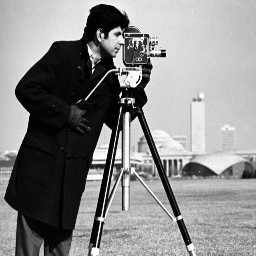

""
"Figure b) - Image converted to polar coordinates, 0 to 2*pi"

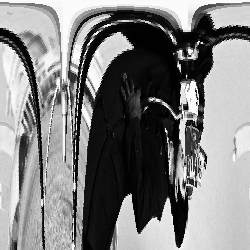

""
"Figure c) - Image converted to polar coordinates, 0 to pi"

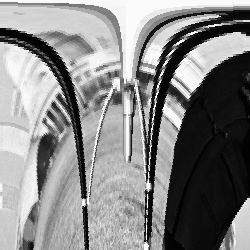

In [5]:
if testing:
    f = mpimg.imread("../data/cameraman.tif")
    ia.adshow(f, "Figure a) - Original Image")
    g = polar(f,(250,250))
    ia.adshow(g, "Figure b) - Image converted to polar coordinates, 0 to 2*pi")

    g = polar(f,(250,250), np.pi)
    ia.adshow(g, "Figure c) - Image converted to polar coordinates, 0 to pi")

### Example 3 - non square image

""
original

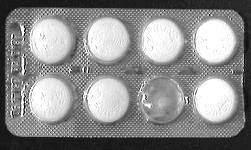

""
polar

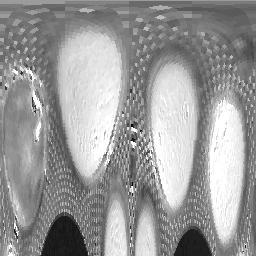

""
f1: transposed

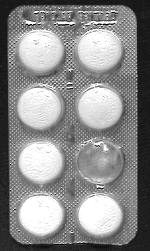

""
polar of f1

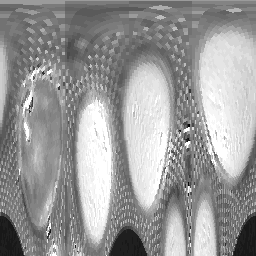

In [6]:
if testing:
    f = mpimg.imread('../data/astablet.tif')
    ia.adshow(f,'original')
    g = polar(f, (256,256))
    ia.adshow(g,'polar')
    f1 = f.transpose()
    ia.adshow(f1,'f1: transposed')
    g1 = polar(f1, (256,256))
    ia.adshow(g1,'polar of f1')
   

## Equation

$$ \begin{matrix}
    x & = & r  *  cos \theta \\
    y & = & r  *  sin \theta \\
\end{matrix} $$   

$$ \begin{matrix}
    r & = & \sqrt{x^2 + y^2}
\end{matrix} $$

## Contributions

- Luiz Wetzel, 1st semester 2010
- Danilo Rodrigues Pereira, 1st semester 2011